## Optimization: Assignment 1

### Non-linear least squares problems and the Levenberg-Marquardt algorithm

#### Introduction to the algorithm

- Version of Newton method where sum involving Hessians is replaced by matrix that is easier to compute, instead of being completely omitted (as in Gauss-Newton)

$$
    (\nabla F(x) \nabla F(x)^T + \sum_{i=1}^m f_i(x) \nabla^2 f_i(x)) \, p = - \nabla F(x)F(x)
$$

- The replacement is the identity matrix multiplied by a factor $\lambda$

- $\lambda$ is dynamically updated each iteration
    - We start with a value of 1. 
    - If the function value doesn't decrease, we set $\lambda_{k+1} = 1.5 * \lambda_k$ 
    - If the function value decreases, we set $\lambda_{k+1} = \lambda_k / 5$ 
- The motivation is improve convergence as we get closer to the solution

- To summarize, in each iteration, we do the update 

$$
    x_{k+1} = x_k + \alpha \, [\nabla F(x) \nabla F(x)^T + \lambda I]^{-1} \, \nabla F(x)F(x)
$$

- We used a fixed $\alpha = 1$ which worked well on the two cases we tried, but could have been improved using line search or backtracking

- Since the squared loss is a convex function, the optimality condition is that the gradient $\nabla f(x) = \nabla F(x) F(x) \approx 0$

- Two options, one using supplied function for calculating the Jacobian, one using central difference approximation of the Jacobian

$$
    \frac{df}{dx_1} = \frac{f(x_1 + h, x_2, \, ...) - f(x_1 - h, x_2, \, ...)}{2h}
$$

In this demo we will test the LM code on two nonlinear least squares problems: the one given in the assigment and a cubic function with three parameters.

Let's start by importing the necessary packages and the class containing the optimization algorithm.

In [23]:
# Standard package imports

import numpy as np
import matplotlib.pyplot as plt
import jupyter_black

jupyter_black.load()

In [82]:
# Change working directory to core to enable codebase imports

import os

# os.chdir("..\\optimization-repo")
%load_ext autoreload
%autoreload 2

# Import Levenberg-Marquardt class from codebase

from levenberg_marquardt import LevenbergMarquardt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
os.getcwd()

'C:\\Users\\nystrom jakob\\Documents\\002 Data science master\\006 Optimization\\003 Assignments\\optimization-repo'

### Test case 1: Exponential function given in the assignment

The model is given by 

$$
    y(t) = x_1 e^{x_2 t}
$$

We will test this on the datapoints in the assignment. Start by creating arrays with inputs and defining the function and gradient to be used.

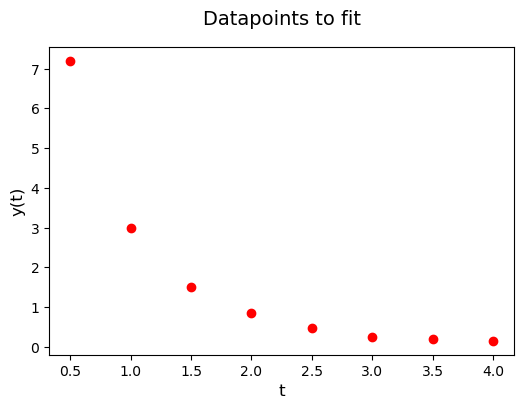

In [83]:
# Define values of t and y_t
t = np.arange(0.5, 4.5, 0.5)
y_t = np.array([7.2, 3.0, 1.5, 0.85, 0.48, 0.25, 0.20, 0.15])

# Create plot
plt.figure(figsize=(6, 4))
plt.title("Datapoints to fit", fontsize=14, pad=16)
plt.xlabel("t", fontsize=12)
plt.ylabel("y(t)", fontsize=12)

# Plot solution and original datapoints
plt.scatter(t, y_t, color="red")
plt.show()

In [84]:
# Define test function
def test_function_1(x_k):

    fx = y_t - (x_k[0] * np.exp(x_k[1] * t))
    return fx


# Define gradient function
def test_gradient_1(x_k):

    grad_fx = np.array([-np.exp(x_k[1] * t), -t * x_k[0] * np.exp(x_k[1] * t)])
    return grad_fx

#### 1.1) Run the algorithm with gradient function supplied

------ Output report ------

Successful convergence: True
Parameter values: [15.62069798 -1.57153619]
Function value (MSE): 0.021620623854352435
Number of iterations: 36
Final gradient vector: [-0.00074356  0.00023087]
Residual vector: [ 0.08102695 -0.2450419   0.02081236  0.17574181  0.17265285  0.10990193
  0.13613909  0.12089028]


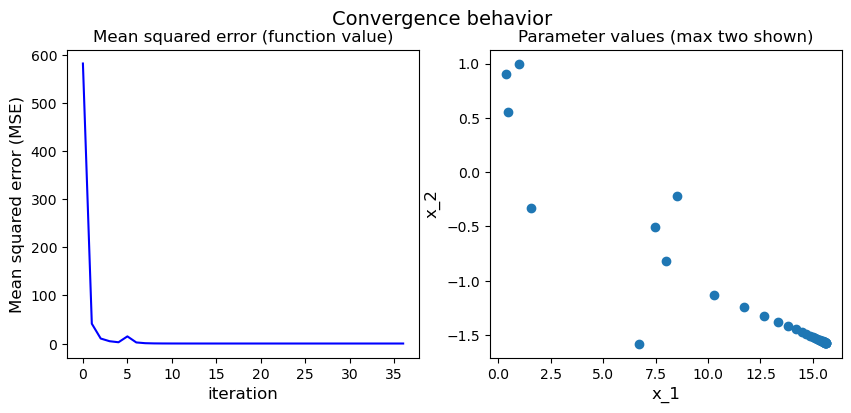

In [85]:
# Initialize optimizer WITH gradient argument
optimizer_1 = LevenbergMarquardt(
    func=test_function_1,
    grad=test_gradient_1,
    tol=1e-3,
    lambda_=1,
    alpha=1,
    max_iter=1000,
    plot_conv=True,
)

# Set initial parameter values
x0 = np.array([1, 1])

# Run optimizer
x_k, mse, y_diff = optimizer_1.minimize(x0)

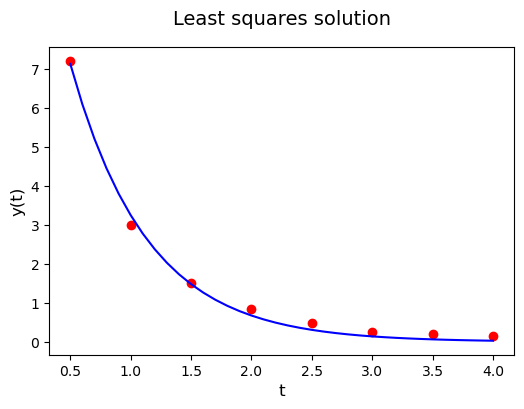

In [71]:
# Plot the results

# Create plot
plt.figure(figsize=(6, 4))
plt.title("Least squares solution", fontsize=14, pad=16)
plt.xlabel("t", fontsize=12)
plt.ylabel("y(t)", fontsize=12)

# Calculate least squares solution (line)
line_range = np.arange(min(t), max(t) + 0.1, 0.1)
line_values = [x_k[0] * np.exp(x_k[1] * line_range[i]) for i in range(len(line_range))]

# Plot solution and original datapoints
plt.scatter(t, y_t, color="red")
plt.plot(line_range, line_values, color="blue")
plt.show()

#### 1.2) Run the algorithm using numerically approximated gradient

------ Output report ------

Successful convergence: True
Parameter values: [15.62069717 -1.57153611]
Function value (MSE): 0.021620624010926272
Number of iterations: 36
Final gradient vector: [-0.00074356  0.00023087]
Residual vector: [ 0.08102703 -0.245042    0.02081225  0.17574173  0.1726528   0.1099019
  0.13613907  0.12089027]


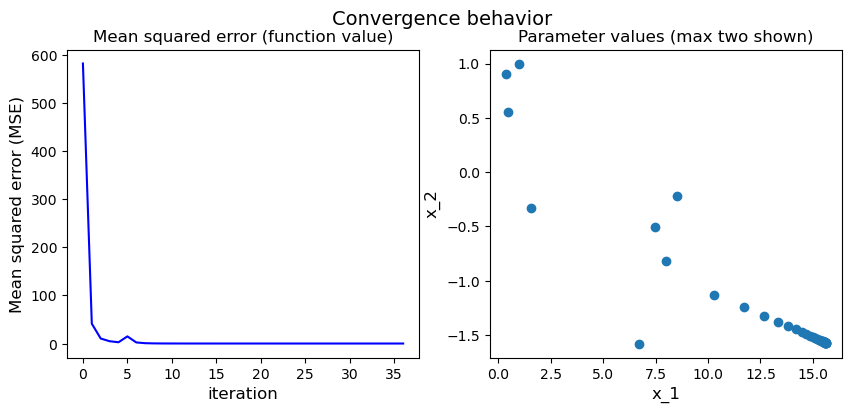

In [72]:
# Initialize optimizer WITHOUT gradient argument
optimizer_1 = LevenbergMarquardt(
    func=test_function_1,
    tol=1e-3,
    lambda_=1,
    alpha=1,
    max_iter=1000,
    plot_conv=True,
)

# Set initial parameter values
x0 = np.array([1, 1])

# Run optimizer
x_k, mse, y_diff = optimizer_1.minimize(x0)

------ Output report ------

Successful convergence: True
Parameter values: [15.62069717 -1.57153611]
Function value (MSE): 0.021620624010926272
Number of iterations: 36
Final gradient vector: [-0.00074356  0.00023087]
Residual vector: [ 0.08102703 -0.245042    0.02081225  0.17574173  0.1726528   0.1099019
  0.13613907  0.12089027]


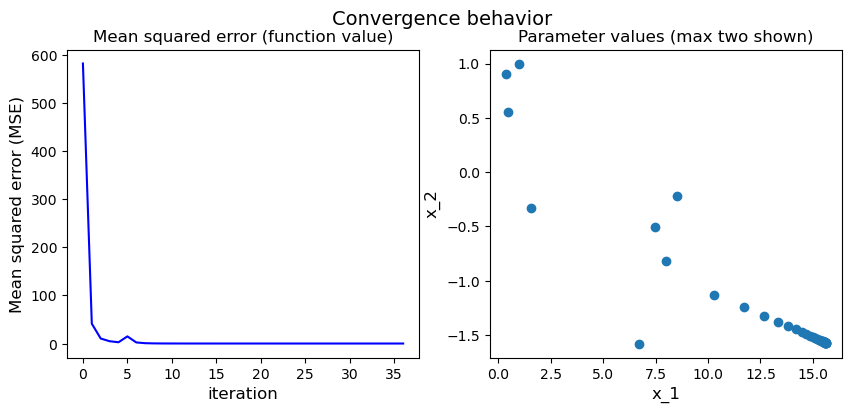

------ Output report ------

Successful convergence: True
Parameter values: [15.62022976 -1.57149979]
Function value (MSE): 0.021620229892436157
Number of iterations: 43
Final gradient vector: [-0.00065518  0.00020379]
Residual vector: [ 0.08069744 -0.24488634  0.02102264  0.17590118  0.17275445  0.10996144
  0.13617223  0.12090812]


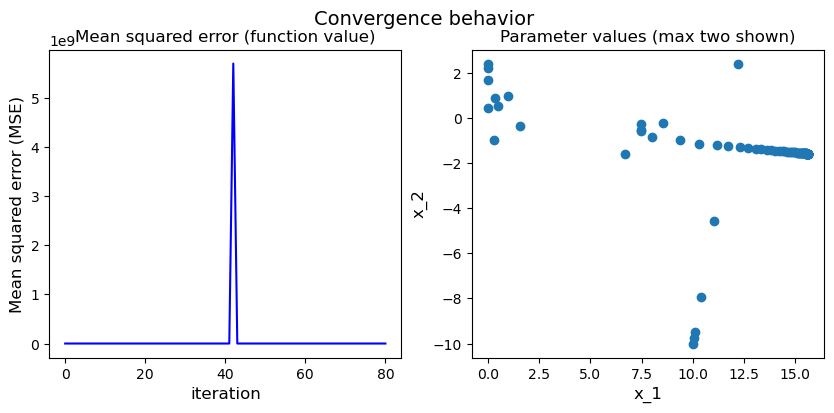

------ Output report ------

Successful convergence: True
Parameter values: [15.62179643 -1.57163051]
Function value (MSE): 0.021620381030091597
Number of iterations: 165
Final gradient vector: [-0.00069041  0.00021459]
Residual vector: [ 0.08082881 -0.24494839  0.02093877  0.17583763  0.17271393  0.10993771
  0.13615901  0.12090101]


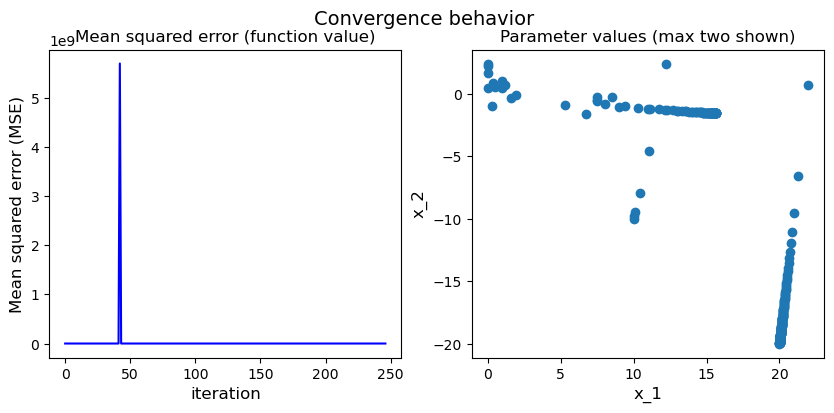

In [73]:
# Initialize optimizer WITH gradient argument
optimizer_1 = LevenbergMarquardt(
    func=test_function_1,
    # grad=test_gradient_1,
    tol=1e-3,
    lambda_=1,
    alpha=1,
    max_iter=1000,
    plot_conv=True,
)

# Set initial parameter values
x0_list = [np.array([1, 1]), np.array([10, -10]), np.array([20, -20])]

# Run optimizer
for x0 in x0_list:
    x_k, mse, y_diff = optimizer_1.minimize(x0)

In [74]:
from scipy import optimize


def test_function_3(x_k):

    fx = y_t - (x_k[0] * np.exp(x_k[1] * t))
    mse = (fx @ fx.T) / len(fx)
    return mse


# optimize.minimize(test_function_3, x0)
optimize.least_squares(test_function_1, x0, method="lm")

C:\Users\nystrom jakob\AppData\Local\Temp\ipykernel_54348\1124899322.py:4: RuntimeWarning: overflow encountered in exp
  fx = y_t - (x_k[0] * np.exp(x_k[1] * t))


 active_mask: array([0, 0])
        cost: 0.08647543330262145
         fun: array([ 0.07825104, -0.24372782,  0.02258621,  0.17708549,  0.17350906,
        0.11040323,  0.13641815,  0.12104051])
        grad: array([-8.57581992e-11,  1.73795092e-06])
         jac: array([[-4.55467868e-01, -3.56087448e+00],
       [-2.07450979e-01, -3.24372782e+00],
       [-9.44872552e-02, -2.21612069e+00],
       [-4.30359087e-02, -1.34582902e+00],
       [-1.96014736e-02, -7.66227346e-01],
       [-8.92784140e-03, -4.18790323e-01],
       [-4.06634489e-03, -2.22536458e-01],
       [-1.85208944e-03, -1.15837950e-01]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 41
        njev: None
  optimality: 1.7379509156811856e-06
      status: 2
     success: True
           x: array([15.63611718, -1.57286021])

### Test case 2: Cubic function

The model is now given by 

$$
    y(t) = x_1t + x_2t^2 - x_3t^3
$$

Datapoints (i.e. the "true" $y$-values) are simulated using the parameters $x = \{x_1 = 1, x_2 = 1.5, x_3 = -2\}$ and addition of a noise term $\epsilon \sim \mathcal{N}(0, 2)$.

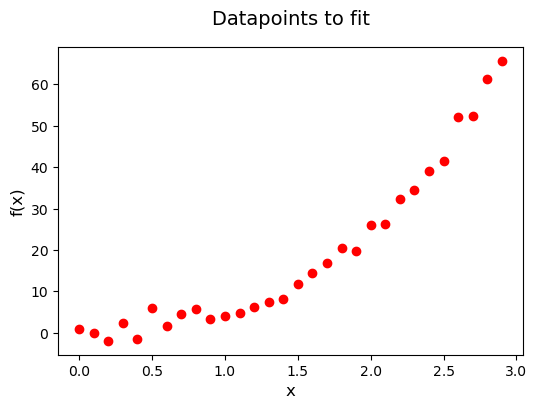

In [75]:
# Define values of t, y_t and x0
x_true = [1, 1.5, -2]
y_calc = (
    lambda t: x_true[0] * t + x_true[1] * np.power(t, 2) - x_true[2] * np.power(t, 3)
)
t = np.array(np.arange(0, 3, 0.1))
y_t = np.array([y_calc(t_val) for t_val in t]) + np.random.normal(
    loc=0, scale=2, size=(1, len(t))
)

# Create plot
plt.figure(figsize=(6, 4))
plt.title("Datapoints to fit", fontsize=14, pad=16)
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)

# Plot solution and original datapoints
plt.scatter(t, y_t, color="red")
plt.show()

In [76]:
# Define test function
def test_function_2(x_k):

    fx = y_t - (x_k[0] * t + x_k[1] * np.power(t, 2) - x_k[2] * np.power(t, 3))
    return fx


# Define gradient function
def test_gradient_2(x_k):

    grad_fx = np.array([-t, -2 * t, 3 * t])
    return grad_fx

#### 2.1) Run the algorithm with gradient function supplied

------ Output report ------

Successful convergence: True
Parameter values: [ 1.81151839  2.62303677 -1.43455516]
Function value (MSE): 4.745250214870299
Number of iterations: 99
Final gradient vector: [-0.00014161 -0.00028322  0.00042483]
Residual vector: [ 0.87085157 -0.19121344 -2.37228572  1.5065164  -2.71296383  4.16410087
 -0.61370683  1.60121711  1.87467091 -1.35009101 -1.71854045 -2.25772392
 -2.08048243 -2.4072282  -3.32387534 -1.64623482 -1.04889391 -0.73787504
  0.25404966 -2.88374017  0.33525432 -2.28351073  0.44826884 -1.02200194
 -0.22052019 -1.80967267  4.43453075  0.12292237  4.20836556  3.38291568]


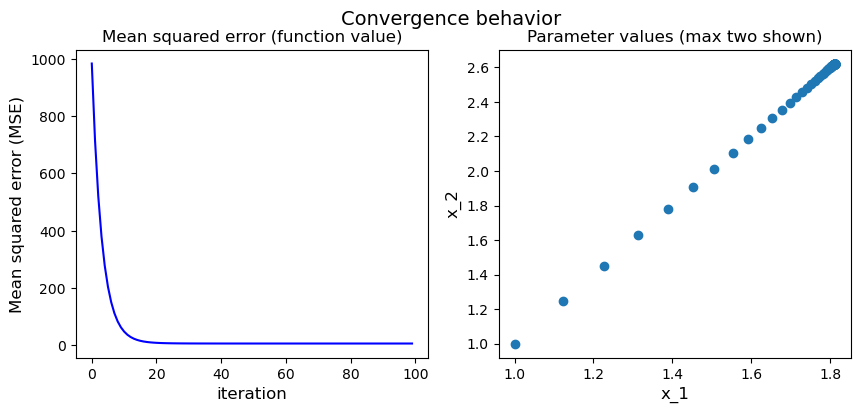

In [77]:
# Initialize optimizer WITH gradient argument
optimizer_2 = LevenbergMarquardt(
    func=test_function_2,
    grad=test_gradient_2,
    tol=1e-3,
    lambda_=1,
    alpha=0.1,
    max_iter=1000,
    plot_conv=True,
)

# Set initial parameter values
x0 = np.array([1, 1, 1])

# Run optimizer
x_k, mse, y_diff = optimizer_2.minimize(x0)

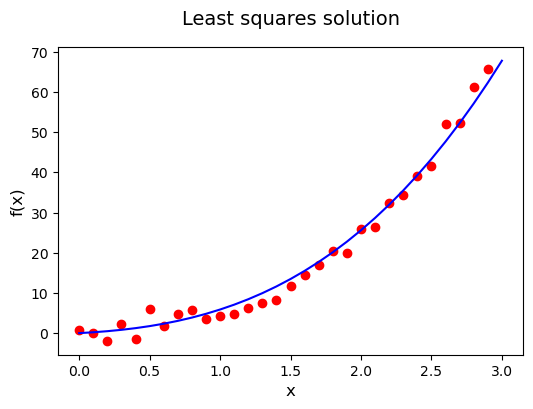

In [78]:
# Plot the results

# Create plot
plt.figure(figsize=(6, 4))
plt.title("Least squares solution", fontsize=14, pad=16)
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)

# Calculate least squares solution (line)
line_range = np.arange(min(t), max(t) + 0.1, 0.1)
line_values = [
    x_k[0] * i + x_k[1] * np.power(i, 2) - x_k[2] * np.power(i, 3) for i in line_range
]

# Plot solution and original datapoints
plt.scatter(t, y_t, color="red")
plt.plot(line_range, line_values, color="blue")
plt.show()

#### 2.2) Run the algorithm using numerically approximated gradient

------ Output report ------

Successful convergence: True
Parameter values: [ 3.32450643 -0.86367489 -2.62258612]
Function value (MSE): 2.8699084460363635
Number of iterations: 157
Final gradient vector: [-0.00011637 -0.00021292  0.00059757]
Residual vector: [ 0.87085157 -0.30883285 -2.54491857  1.33434792 -2.83631832  4.1307818
 -0.52289722  1.84312048  2.28750493 -0.75361762 -0.93284715 -1.28435836
 -0.92812044 -1.09167378 -1.86806068 -0.08022029  0.59013195  0.92984541
  1.8990198  -1.32009343  1.75187639 -1.08674279  1.34522502 -0.51194332
 -0.19157313 -2.36317934  3.1901     -1.92803101  1.22816285 -0.65639126]


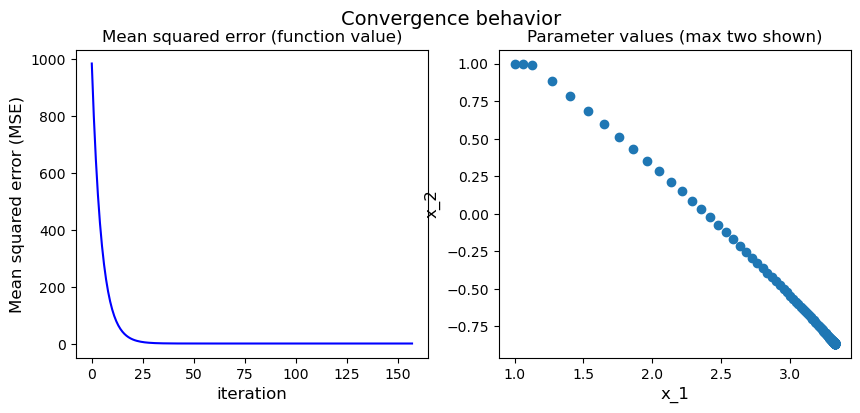

In [79]:
# Initialize optimizer WITH gradient argument
optimizer_2 = LevenbergMarquardt(
    func=test_function_2,
    tol=1e-3,
    lambda_=1,
    alpha=0.1,
    max_iter=1000,
    plot_conv=True,
)

# Set initial parameter values
x0 = np.array([1, 1, 1])

# Run optimizer
x_k, mse, y_diff = optimizer_2.minimize(x0)

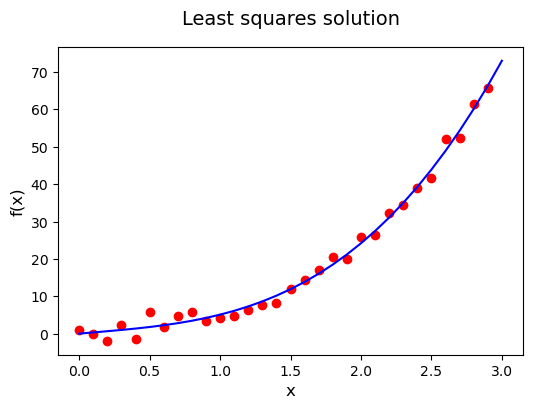

In [80]:
# Plot the results

# Create plot
plt.figure(figsize=(6, 4))
plt.title("Least squares solution", fontsize=14, pad=16)
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)

# Calculate least squares solution (line)
line_range = np.arange(min(t), max(t) + 0.1, 0.1)
line_values = [
    x_k[0] * i + x_k[1] * np.power(i, 2) - x_k[2] * np.power(i, 3) for i in line_range
]

# Plot solution and original datapoints
plt.scatter(t, y_t, color="red")
plt.plot(line_range, line_values, color="blue")
plt.show()